A. Import Modules

In [1]:
import h2o
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import xgboost as xgb
h2o.init(max_mem_size='6G') # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
from pandas.tools.plotting import scatter_matrix

Checking whether there is an H2O instance running at http://localhost:54321. connected.


//anaconda/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/lib/python3.5/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
//anaconda/lib/python3.5/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
//anaconda/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
//anaconda/lib/python3.5/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormat

H2O cluster uptime:,1 hour 3 mins
H2O cluster version:,3.12.0.1
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_zhaorc_uwm3xe
H2O cluster total nodes:,1
H2O cluster free memory:,5.294 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
%matplotlib inline

//anaconda/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
//anaconda/lib/python3.5/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
//anaconda/lib/python3.5/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
//anaconda/lib/python3.5/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

B. Import Data & Create Sales Price Dummy Column in Test Dataset

In [103]:
train = h2o.import_file('train.csv')
test = h2o.import_file('test.csv')

dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'SalePrice'
test.columns = cols
print(train.shape)
print(test.shape)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
(1460, 81)
(1459, 81)


In [105]:
test.describe()

Rows:1459
Cols:81




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
type,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,int,enum,int,int,int,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,enum,int,enum,int,enum,enum,int,enum,int,int,enum,enum,enum,int,int,int,int,int,int,enum,enum,enum,int,int,int,enum,enum,real
mins,1461.0,20.0,,21.0,1470.0,,,,,,,,,,,,,1.0,1.0,1879.0,1950.0,,,,,,0.0,,,,,,,,0.0,,0.0,0.0,0.0,,,,,407.0,0.0,0.0,407.0,0.0,0.0,0.0,0.0,0.0,0.0,,3.0,,0.0,,,1895.0,,0.0,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,,,0.0,1.0,2006.0,,,0.0011771719356545862
mean,2190.0,57.37834132967786,,68.58035714285714,9819.161069225496,,,,,,,,,,,,,6.078821110349555,5.5538039753255655,1971.357779300891,1983.6627827278958,,,,,,100.70914127423822,,,,,,,,439.2037037037037,,52.61934156378601,554.2949245541837,1046.1179698216736,,,,,1156.534612748458,325.96778615490064,3.5435229609321452,1486.0459218642907,0.4344543582704187,0.06520247083047358,1.570938999314599,0.3776559287183002,2.8540095956134337,1.0424948594928032,,6.385195339273475,,0.5812200137080191,,,1977.7212165097756,,1.7661179698216738,472.76886145404666,,,,93.17477724468814,48.3139136394791,24.24331734064428,1.794379712131597,17.064427690198766,1.7443454420836186,,,,58.16792323509253,6.104180945853324,2007.7697052775875,,,0.5141389835311625
maxs,2919.0,190.0,,200.0,56600.0,,,,,,,,,,,,,10.0,9.0,2010.0,2010.0,,,,,,1290.0,,,,,,,,4010.0,,1526.0,2140.0,5095.0,,,,,5095.0,1862.0,1064.0,5095.0,3.0,2.0,4.0,2.0,6.0,2.0,,15.0,,4.0,,,2207.0,,5.0,1488.0,,,,1424.0,742.0,1012.0,360.0,576.0,800.0,,,,17000.0,12.0,2010.0,,,0.9997762074490602
sigma,421.32133421732476,42.74687961871821,,22.376841280775125,4955.51732692645,,,,,,,,,,,,,1.4368116404730185,1.1137396032892084,30.390070837205236,21.130466908170494,,,,,,177.6259001036157,,,,,,,,455.2680419797154,,176.7539261267296,437.26048581127935,442.89862416784166,,,,,398.165819592379,420.61022646910345,44.043250864375565,485.5660986532533,0.5306475357080622,0.2524682621647406,0.5551898880356613,0.5030166769415858,0.8297883627354511,0.20847167211324957,,1.5088945751925407,,0.6474204530720101,,,26.431174889801426,,0.7759450711253341,217.04861112784332,,,,127.74488151907603,68.88336411315397,67.22776541956969,20.207841751496495,56.60976290691056,30.491646305342066,,,,630.806977589708,2.722431901250806,1.3017401493802516,,,0.2894917197212411
zeros,0,0,,0,0,,,,,,,,,,,,,0,0,0,0,,,,,,877,,,,,,,,462,,1278,123,41,,,,,0,839,1445,0,849,1364,3,921,2,2,,0,,730,,,0,,76,76,,,,762,642,1208,1446,1319,1453,,,,1408,0,0,,,0
missing,0,0,0,227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,78,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1461.0,20.0,RH,80.0,11622.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NA,MnPrv,NA,0.0,6.0,2010.0,WD,Normal,0.723380154

### Transform to pandas dataframe to wrangle the data

In [64]:
plotdata=train.as_data_frame(use_pandas=True)
plotdatatest=test.as_data_frame(use_pandas=True)

#### Check the distribution of each input variables to identify data prep steps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117db45c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1186fbc88>]], dtype=object)

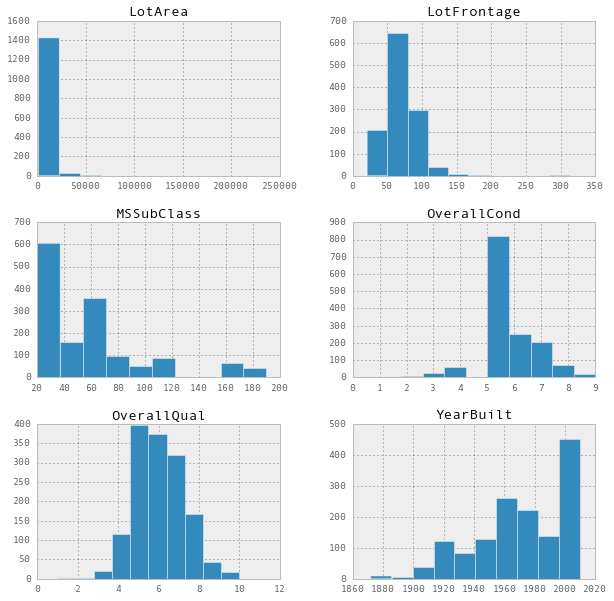

In [5]:
plotdata.iloc[:,1:20].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17115a7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1690b0390>]], dtype=object)

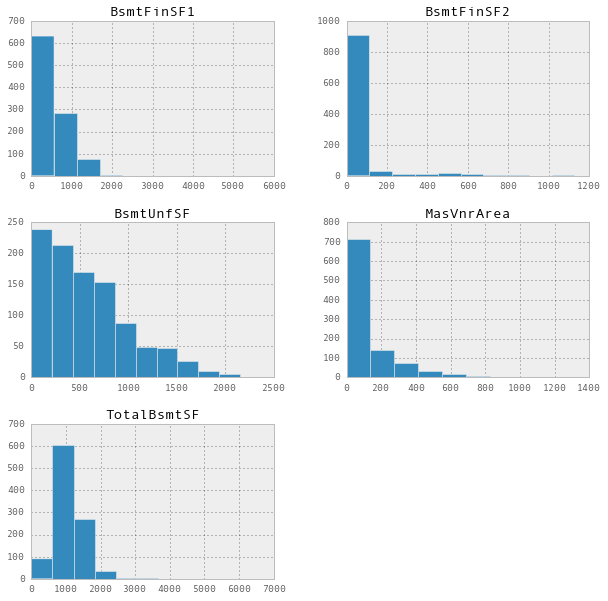

In [182]:
plotdata.iloc[:,20:40].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a9ad54e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1aa93ff28>]], dtype=object)

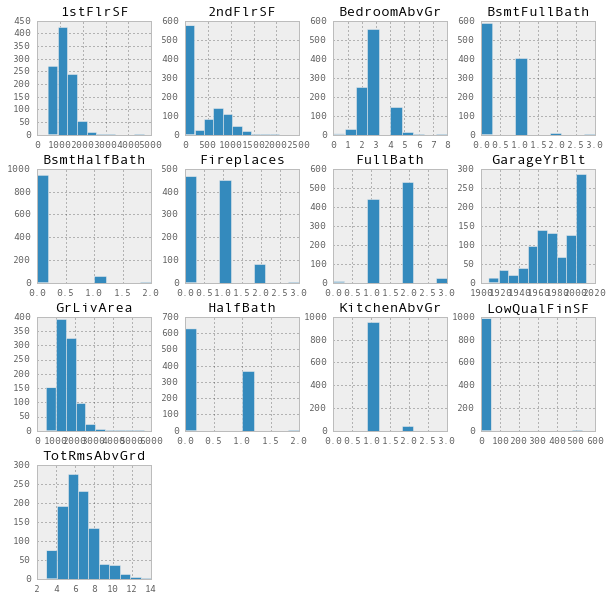

In [123]:
plotdata.iloc[:,40:60].hist(figsize=(10,10))

#### As we can see from the distributions of numerical variables, some are having outliers issue and majority is not normal distributed, which indicates standardization

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


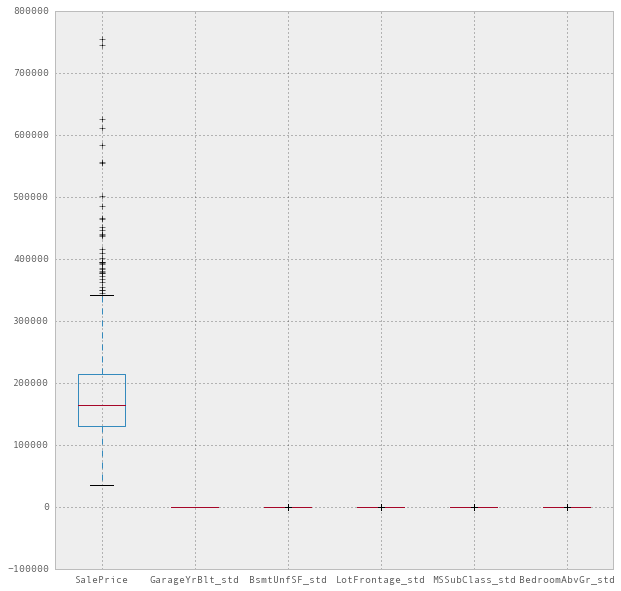

In [118]:
pd.options.display.mpl_style = 'default'
plotdata.iloc[:,40:50].plot(kind='box',figsize=(10,10))

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


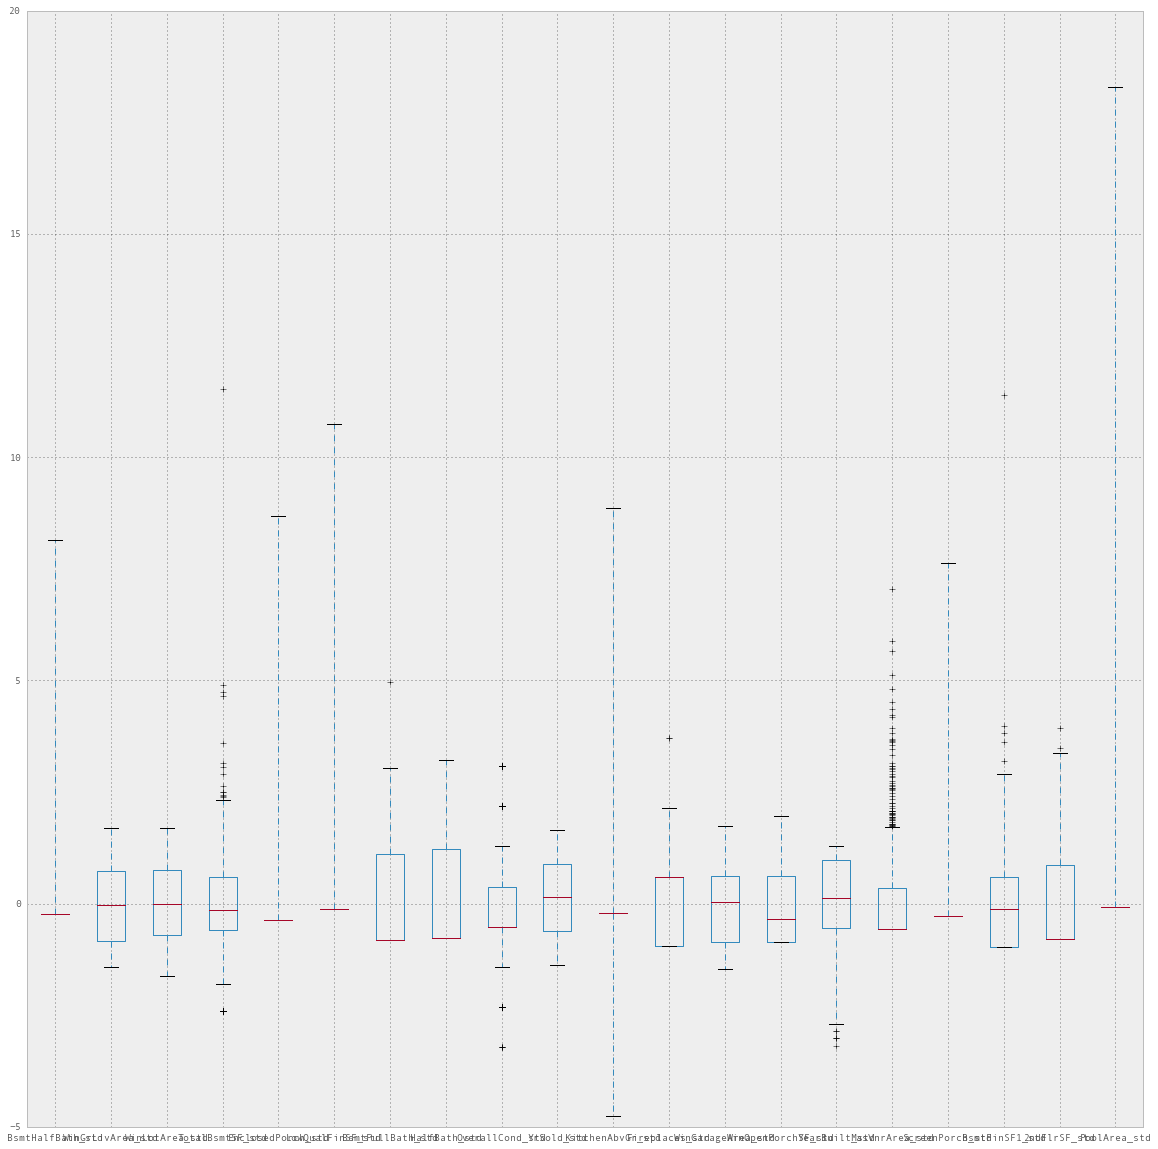

In [119]:
pd.options.display.mpl_style = 'default'
plotdata.iloc[:,50:70].plot(kind='box',figsize=(20,20))

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


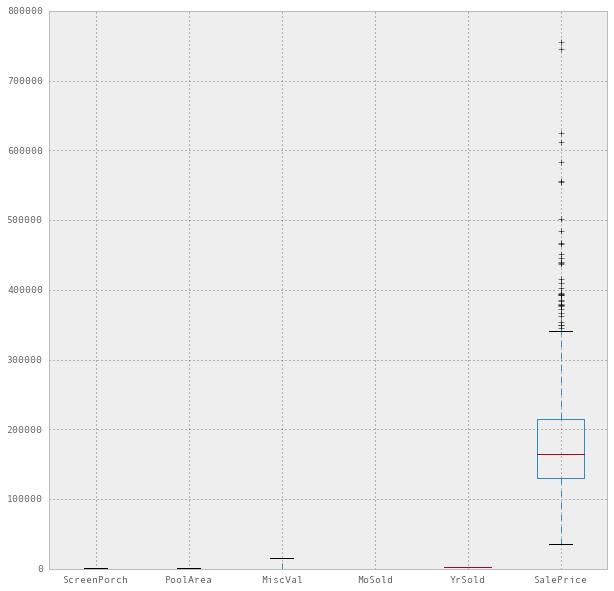

In [105]:
pd.options.display.mpl_style = 'default'
plotdata.iloc[:,70:81].plot(kind='box',figsize=(10,10))

Using box plot to identify thoes variables that have outlier issue.

Winsorize Varaiables that have outliers issue.

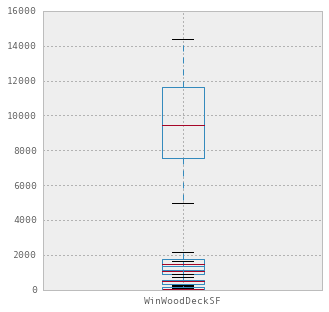

In [65]:
plotdata['WinLotArea']=winsorize(plotdata['LotArea'],limits=[0.1,0.1])
plotdata['WinLotArea'].plot(kind='box',figsize=(5,5))
plotdata['Win1stFlrSF']=winsorize(plotdata['1stFlrSF'],limits=[0.1,0.1])
plotdata['Win1stFlrSF'].plot(kind='box',figsize=(5,5))
plotdata['WinGarageArea']=winsorize(plotdata['GarageArea'],limits=[0.1,0.1])
plotdata['WinGarageArea'].plot(kind='box',figsize=(5,5))
plotdata['WinGrLivArea']=winsorize(plotdata['GrLivArea'],limits=[0.1,0.1])
plotdata['WinGrLivArea'].plot(kind='box',figsize=(5,5))
plotdata['WinOpenPorchSF']=winsorize(plotdata['OpenPorchSF'],limits=[0.1,0.1])
plotdata['WinOpenPorchSF'].plot(kind='box',figsize=(5,5))
plotdata['WinWoodDeckSF']=winsorize(plotdata['WoodDeckSF'],limits=[0.1,0.1])
plotdata['WinWoodDeckSF'].plot(kind='box',figsize=(5,5))

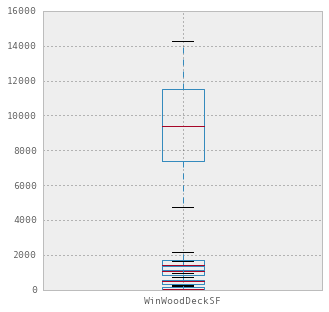

In [66]:
plotdatatest['WinLotArea']=winsorize(plotdatatest['LotArea'],limits=[0.1,0.1])
plotdatatest['WinLotArea'].plot(kind='box',figsize=(5,5))
plotdatatest['Win1stFlrSF']=winsorize(plotdatatest['1stFlrSF'],limits=[0.1,0.1])
plotdatatest['Win1stFlrSF'].plot(kind='box',figsize=(5,5))
plotdatatest['WinGarageArea']=winsorize(plotdatatest['GarageArea'],limits=[0.1,0.1])
plotdatatest['WinGarageArea'].plot(kind='box',figsize=(5,5))
plotdatatest['WinGrLivArea']=winsorize(plotdatatest['GrLivArea'],limits=[0.1,0.1])
plotdatatest['WinGrLivArea'].plot(kind='box',figsize=(5,5))
plotdatatest['WinOpenPorchSF']=winsorize(plotdatatest['OpenPorchSF'],limits=[0.1,0.1])
plotdatatest['WinOpenPorchSF'].plot(kind='box',figsize=(5,5))
plotdatatest['WinWoodDeckSF']=winsorize(plotdatatest['WoodDeckSF'],limits=[0.1,0.1])
plotdatatest['WinWoodDeckSF'].plot(kind='box',figsize=(5,5))

In [67]:
plotdata.drop(['WoodDeckSF','OpenPorchSF','GrLivArea','GarageArea','1stFlrSF','LotArea'],axis=1,inplace=True)
plotdatatest.drop(['WoodDeckSF','OpenPorchSF','GrLivArea','GarageArea','1stFlrSF','LotArea'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14ba7d9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15f784fd0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x160320c88>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x161288f28>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x18737dbe0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1884db9b0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x189639780>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18a4cb2b0>]], dtype=object)

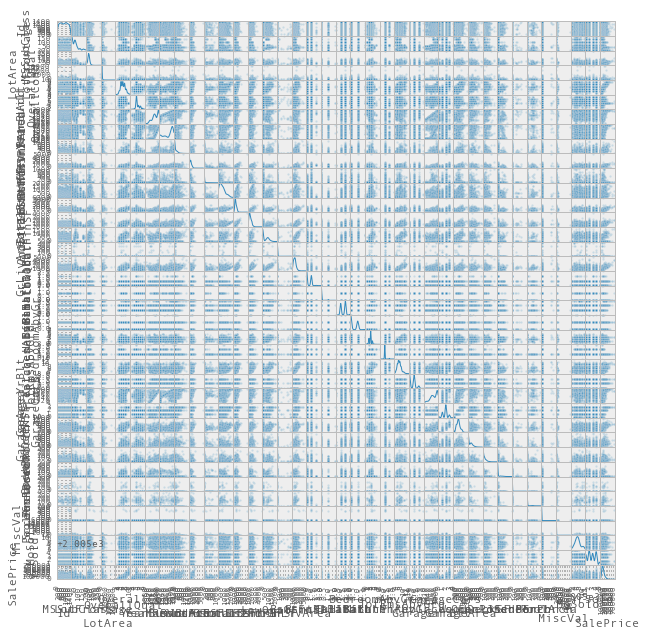

In [51]:
scatter_matrix(plotdata, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [68]:
plttr=h2o.H2OFrame(plotdata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
def get_type_lists(frame=plttr, rejects=['Id', 'SalePrice']):

    """Creates lists of numeric and categorical variables.
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.
    """
    
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [70]:
original_nums, cats = get_type_lists()

Numeric = ['BedroomAbvGr', 'YearRemodAdd', 'TotRmsAbvGrd', 'BsmtHalfBath', 'WinGrLivArea', 'ScreenPorch', 'LotFrontage', 'Fireplaces', 'KitchenAbvGr', 'OverallQual', 'EnclosedPorch', '3SsnPorch', 'MasVnrArea', '2ndFlrSF', 'BsmtFinSF2', 'BsmtFullBath', 'PoolArea', 'YearBuilt', 'GarageCars', 'WinWoodDeckSF', 'WinOpenPorchSF', 'MoSold', 'BsmtUnfSF', 'MiscVal', 'LowQualFinSF', 'MSSubClass', 'FullBath', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallCond', 'HalfBath', 'GarageYrBlt', 'WinLotArea', 'Win1stFlrSF', 'WinGarageArea', 'YrSold']

Categorical = ['Functional', 'GarageCond', 'Exterior2nd', 'HeatingQC', 'ExterQual', 'Fence', 'GarageType', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'MasVnrType', 'SaleType', 'BsmtExposure', 'FireplaceQu', 'LandContour', 'LandSlope', 'ExterCond', 'GarageFinish', 'RoofStyle', 'PavedDrive', 'RoofMatl', 'MSZoning', 'LotConfig', 'BsmtFinType1', 'Foundation', 'BldgType', 'PoolQC', 'Condition2', 'Alley', 'Heating', 'SaleCondition', 'MiscFeature', 'Condition1', 'HouseSty

### Standardize numerical input variables 

In [71]:
_tr = plotdata.copy()
_ts = plotdatatest.copy()

In [72]:
for col_name in original_nums:
    new_col_name = col_name + '_std'
    _tr[new_col_name] = (plotdata[col_name] - plotdata[col_name].mean())/plotdata[col_name].std()
    _ts[new_col_name] = (plotdatatest[col_name] - plotdatatest[col_name].mean())/plotdatatest[col_name].std()

In [73]:
for col_name in original_nums:
    del _tr[col_name]
    del _ts[col_name]

### Convert back to h2o

In [74]:
train=h2o.H2OFrame(_tr)
test=h2o.H2OFrame(_ts)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
trainnew.describe()
print('--------------------------------------------------------------')
testnew.describe()

Rows:1460
Cols:81




,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BedroomAbvGr_std,YearRemodAdd_std,TotRmsAbvGrd_std,BsmtHalfBath_std,WinGrLivArea_std,ScreenPorch_std,LotFrontage_std,Fireplaces_std,KitchenAbvGr_std,OverallQual_std,EnclosedPorch_std,3SsnPorch_std,MasVnrArea_std,2ndFlrSF_std,BsmtFinSF2_std,BsmtFullBath_std,PoolArea_std,YearBuilt_std,GarageCars_std,WinWoodDeckSF_std,WinOpenPorchSF_std,MoSold_std,BsmtUnfSF_std,MiscVal_std,LowQualFinSF_std,MSSubClass_std,FullBath_std,TotalBsmtSF_std,BsmtFinSF1_std,OverallCond_std,HalfBath_std,GarageYrBlt_std,WinLotArea_std,Win1stFlrSF_std,WinGarageArea_std,YrSold_std
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,34900.0,-3.5137478591635483,-1.6887898479984367,-2.7795169608179364,-0.24097846650905574,-1.4198442469135284,-0.27011580124313217,-2.019784217830265,-0.9509006699369512,-4.7498588539862086,-3.6871495308555806,-0.3592018228542554,-0.11629943710230208,-0.5726372892119138,-0.7948908644380643,-0.2885539604701581,-0.8196835076441235,-0.06866821893757184,-3.2866974672174027,-2.364629726102377,-0.8460582455525355,-0.8615456849657631,-1.9684369798472843,-1.2837357583879423,-0.08765777630136591,-0.12020053800860489,-0.8722638821913684,-2.8408488002532493,-2.4103410492171595,-0.9726849003236182,-4.111561100736463,-0.7613597983235844,-3.179709965286792,-1.6137835102781273,-1.2767993865689162,-1.4573645983861474,-1.367186277969802
mean,730.5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,180921.1958904111,2.0086200498009577e-16,4.529146155340946e-15,-8.17217387510949e-17,5.7462715141731735e-18,-1.4127154307486123e-16,5.827586677109586e-18,-2.6113009324313374e-16,-7.296680620827445e-17,3.638582490861353e-16,1.2110538266663085e-16,2.5261910618912253e-17,1.9353008778866254e-17,-4.4777549723651333e-17,1.7780915628762273e-17,2.168404344971009e-18,1.1145598333150986e-16,8.461520329891559e-17,1.0333530905959343e-15,9.69276742202041e-17,-1.1427490897997217e-16,-8.950088933867839e-17,1.2727178252264215e-16,-4.846383711010205e-17,-1.0232158002831948e-18,-1.3227266504323154e-17,-4.824699667560495e-17,1.4864411784776266e-16,2.470354650008222e-16,-2.862293735361732e-17,3.688997891881929e-16,7.426784881525705e-17,4.051121417492087e-15,1.3308581667259567e-17,2.3979841549948144e-16,-3.924811864397526e-17,3.565478804128802e-14
maxs,1460.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,755000.0,6.292841148012138,1.2174255905655946,4.603311594902235,8.135892035948595,1.6885992954629354,8.338604627661638,10.004221739142885,3.7026690890841056,8.865574248408814,2.820458909096378,8.672337598563447,17.211335458445188,8.26390946436075,3.9356142533042577,8.848605997891852,4.961659106657423,18.299909869656002,1.2823995906581556,2.9878654678657943,1.8052685073148371,1.9677395771025776,2.1001727880223924,4.0029234317160105,31.15459310882023,11.643759769239269,3.1465943981111675,2.604629425177486,11.51700302286161,11.40184617827387,3.077515793964418,3.2156895954239406,1.2755847385221322,1.6836882246810223,1.7396033780210731,1.7413976687797907,1.6446461865129791
sigma,421.6100093688479,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,79442.50288288663,1.0000000000000082,1.0000000000000002,0.9999999999999919,1.000000000000018,1.000000

--------------------------------------------------------------
Rows:1459
Cols:124




,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BedroomAbvGr_std,YearRemodAdd_std,TotRmsAbvGrd_std,BsmtHalfBath_std,WinGrLivArea_std,ScreenPorch_std,LotFrontage_std,Fireplaces_std,KitchenAbvGr_std,OverallQual_std,EnclosedPorch_std,3SsnPorch_std,MasVnrArea_std,2ndFlrSF_std,BsmtFinSF2_std,BsmtFullBath_std,PoolArea_std,YearBuilt_std,GarageCars_std,WinWoodDeckSF_std,WinOpenPorchSF_std,MoSold_std,BsmtUnfSF_std,MiscVal_std,LowQualFinSF_std,MSSubClass_std,FullBath_std,TotalBsmtSF_std,BsmtFinSF1_std,OverallCond_std,HalfBath_std,GarageYrBlt_std,WinLotArea_std,Win1stFlrSF_std,WinGarageArea_std,YrSold_std,Functional_Tencode,Exterior2nd_Tencode,HeatingQC_Tencode,ExterQual_Tencode,Fence_Tencode,GarageType_Tencode,BsmtFinType2_Tencode,CentralAir_Tencode,GarageQual_Tencode,MasVnrType_Tencode,SaleType_Tencode,BsmtExposure_Tencode,FireplaceQu_Tencode,LandContour_Tencode,LandSlope_Tencode,BsmtFinType1_Tencode,GarageCond_Tencode,ExterCond_Tencode,GarageFinish_Tencode,BsmtQual_Tencode,RoofStyle_Tencode,Exterior1st_Tencode,PavedDrive_Tencode,RoofMatl_Tencode,MSZoning_Tencode,LotConfig_Tencode,Foundation_Tencode,BldgType_Tencode,PoolQC_Tencode,Condition2_Tencode,Alley_Tencode,Heating_Tencode,SaleCondition_Tencode,MiscFeature_Tencode,Condition1_Tencode,HouseStyle_Tencode,Electrical_Tencode,Utilities_Tencode,Neighborhood_Tencode,LotShape_Tencode,Street_Tencode,KitchenQual_Tencode,BsmtCond_Tencode
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,1461.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0002378942184140253,-3.4394427829826593,-1.5930922337962812,-2.2434936111036943,-0.2582600690930742,-1.3734213933017212,-0.30143966012116136,-2.1263214296351762,-0.8977473772262465,-5.000654760069599,-3.534785609530218,-0.36061465362326717,-0.08879620764046937,-0.5669732917074077,-0.7749877811847421,-0.2976982900287009,-0.8187249144400626,-0.057207322445492294,-3.039077460386211,-2.2760863307763786,-0.8450603977266182,-0.8757833998810277,-1.8748608343548452,-1.2676538185831319,-0.0922119210813902,-0.08045552704190534,-0.8744109900669876,-2.829552614642909,-2.3619806265761483,-0.9647145488047963,-4.0887510526488935,-0.750782123198182,-3.1296836729605397,-1.6283229027361972,-1.3041679409200522,-1.4276706002600457,-1.3594919680629625,84954.02450980392,106204.02450980392,100679.02450980392,91042.14950980392,133419.96200980392,111434.07450980392,145091.52450980392,111601.52450980392,134853.20367647058,131576.52450980392,107734.02450980392,161376.63366336632,133191.52450980392,163075.56297134238,175531.83179723503,146338.19117647054,118776.94117647059,91754.02450980392,143948.79679144386,134771.7517825312,139864.02450980392,96429.02450980392,114840.96895424835,175904.02450980392,118217.35784313723,165751.57330498463,110363.31736694675,128987.56617647059,178193.4967320261,127029.02450980392,134607.54723707662,77729.02450980392,143816.52450980392,73479.02450980392,150223.0311764706,122402.59593837534,100143.52450980392,178193.4967320261,112866.7168174962,163981.4191419142,95579.02450980392,

Drop additional dataframe, saving the space

In [77]:
ls=[_tr,_ts]
del _tr,_ts
del ls

NameError: name '_tr' is not defined

C. Determine Data Types

In [78]:
def get_type_lists(frame=train, rejects=['Id', 'SalePrice']):

    """Creates lists of numeric and categorical variables.
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.
    """
    
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [79]:
original_nums, cats = get_type_lists()

Numeric = ['OverallCond_std', 'WinWoodDeckSF_std', 'OverallQual_std', 'ScreenPorch_std', 'LotFrontage_std', 'WinGrLivArea_std', 'MasVnrArea_std', 'MiscVal_std', 'YrSold_std', 'TotalBsmtSF_std', 'WinOpenPorchSF_std', 'BsmtFinSF2_std', '2ndFlrSF_std', 'HalfBath_std', 'Win1stFlrSF_std', 'PoolArea_std', '3SsnPorch_std', 'YearRemodAdd_std', 'GarageCars_std', 'WinLotArea_std', 'Fireplaces_std', 'MSSubClass_std', 'BsmtHalfBath_std', 'KitchenAbvGr_std', 'MoSold_std', 'LowQualFinSF_std', 'FullBath_std', 'BsmtUnfSF_std', 'YearBuilt_std', 'GarageYrBlt_std', 'WinGarageArea_std', 'BsmtFinSF1_std', 'EnclosedPorch_std', 'TotRmsAbvGrd_std', 'BsmtFullBath_std', 'BedroomAbvGr_std']

Categorical = ['Functional', 'Exterior2nd', 'HeatingQC', 'ExterQual', 'Fence', 'GarageType', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'MasVnrType', 'SaleType', 'BsmtExposure', 'FireplaceQu', 'LandContour', 'LandSlope', 'GarageCond', 'ExterCond', 'GarageFinish', 'BsmtQual', 'RoofStyle', 'PavedDrive', 'RoofMatl', 'MSZoning'

D. Split into Training and Validation

In [80]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(1001, 81)
(459, 81)


E. Impute Missing Values via Generalized Low Rank Models (GLRM)

In [81]:
def glrm_num_impute(role, frame):

    """ Helper function for imputing numeric variables using GLRM.
    
    :param role: Role of frame to be imputed.
    :param frame: H2OFrame to be imputed.
    :return: H2OFrame of imputed numeric features.
    
    """
    
    # count missing values in training data numeric columns
    print(role + ' missing:\n', [cnt for cnt in frame.nacnt() if cnt != 0.0])

    # initialize GLRM
    matrix_complete_glrm = H2OGeneralizedLowRankEstimator(
        k=10,                    # create 10 features 
        transform='STANDARDIZE', # <- seems very important
        gamma_x=0.001,           # regularization on values in X
        gamma_y=0.05)            # regularization on values in Y

    # train GLRM
    matrix_complete_glrm.train(training_frame=frame, x=original_nums)

    # plot iteration history to ensure convergence
    matrix_complete_glrm.score_history().plot(x='iteration', y='objective', title='GLRM Score History')

    # impute numeric inputs by multiply the calculated xi and yj for the missing values in train
    num_impute = matrix_complete_glrm.predict(frame)

    # count missing values in imputed set
    print('imputed ' + role + ' missing:\n', [cnt for cnt in num_impute.nacnt() if cnt != 0.0])
    
    return num_impute

training missing:
 [179.0, 7.0, 48.0]
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
imputed training missing:
 []


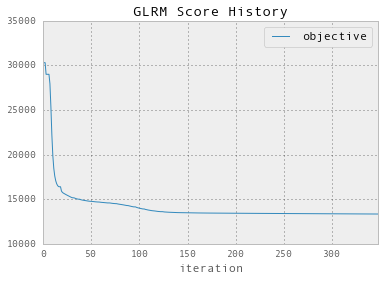

In [82]:
train_num_impute = glrm_num_impute('training', train)

validation missing:
 [80.0, 1.0, 33.0]
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
imputed validation missing:
 []


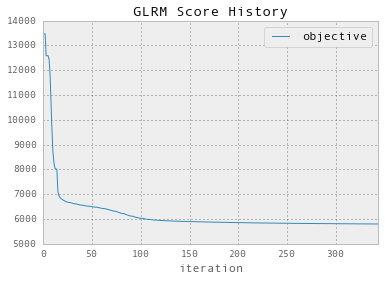

In [83]:
valid_num_impute = glrm_num_impute('validation', valid)

test missing:
 [2.0, 227.0, 15.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 78.0]
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
imputed test missing:
 []


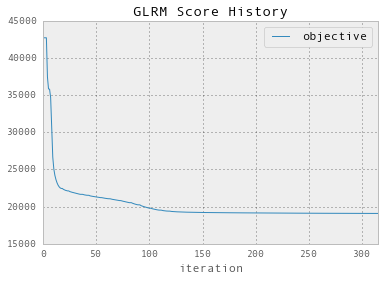

In [84]:
test_num_impute = glrm_num_impute('test', test)

In [85]:
print(train_num_impute.shape)
print(valid_num_impute.shape)
print(test_num_impute.shape)

(1001, 36)
(459, 36)
(1459, 36)


F. Embed Categorical Variables via Generalized Low Rank Models (GLRM)

In [86]:
def glrm_cat_embed(frame):
    
    """ Helper function for embedding caetgorical variables using GLRM.
    
    :param frame: H2OFrame to be embedded.
    :return: H2OFrame of embedded categorical features.
    
    """
    
    # initialize GLRM
    cat_embed_glrm = H2OGeneralizedLowRankEstimator(
        k=50,
        transform='STANDARDIZE',
        loss='Quadratic',
        regularization_x='Quadratic',
        regularization_y='L1',
        gamma_x=0.25,
        gamma_y=0.5)

    # train GLRM
    cat_embed_glrm.train(training_frame=frame, x=cats)

    # plot iteration history to ensure convergence
    cat_embed_glrm.score_history().plot(x='iteration', y='objective', title='GLRM Score History')

    # extracted embedded features
    cat_embed = h2o.get_frame(cat_embed_glrm._model_json['output']['representation_name'])
    
    return cat_embed

glrm Model Build progress: |██████████████████████████████████████████████| 100%


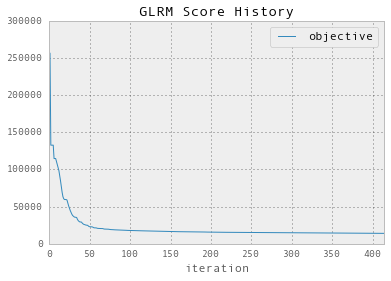

In [87]:
train_cat_embed = glrm_cat_embed(train)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


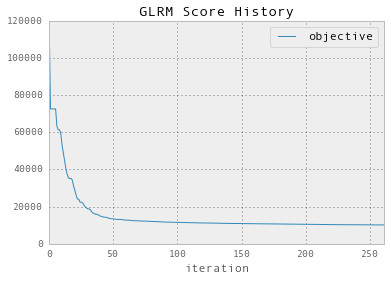

In [89]:
valid_cat_embed = glrm_cat_embed(valid)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


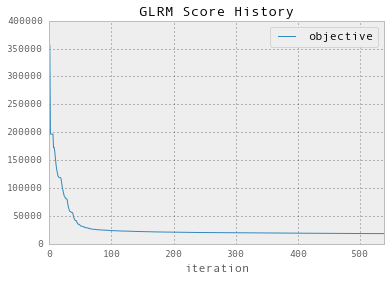

In [90]:
test_cat_embed = glrm_cat_embed(test)

In [84]:
print(train_cat_embed)

Arch1,Arch2,Arch3,Arch4,Arch5,Arch6,Arch7,Arch8,Arch9,Arch10,Arch11,Arch12,Arch13,Arch14,Arch15,Arch16,Arch17,Arch18,Arch19,Arch20,Arch21,Arch22,Arch23,Arch24,Arch25,Arch26,Arch27,Arch28,Arch29,Arch30,Arch31,Arch32,Arch33,Arch34,Arch35,Arch36,Arch37,Arch38,Arch39,Arch40,Arch41,Arch42,Arch43,Arch44,Arch45,Arch46,Arch47,Arch48,Arch49,Arch50
0.151363,0.00112997,-0.154828,-0.146553,0.108559,0.250637,-0.0802053,-0.000236258,0.0809071,-0.120833,-0.0650522,0.138055,-0.0382697,0.200423,0.137681,0.0808421,0.053626,-0.120013,0.132523,-0.201795,-0.0447144,-0.0909133,0.398787,-0.123432,0.120444,-0.0962943,0.1026,-0.157493,0.147486,0.0507434,0.0328773,0.600891,0.0419049,0.151991,-0.0195774,0.340783,-0.0279163,-0.105269,0.0271486,0.0428044,0.066652,-0.0810749,0.0902764,0.184993,0.000539041,-0.00610151,-0.0717014,0.151949,0.121782,0.0509878
-0.252479,-0.191585,0.148912,0.199655,-0.11197,0.490524,0.0619599,-0.174144,0.0163415,-0.033704,0.0646557,-0.0126972,0.136682,0.168537,-0.260551,0.0790278,-0.127555,0.106958,0.198183,-0.159345,-0.0700522,-0.275104,0.017752,-0.0320235,0.22115,0.26951,0.104982,0.314274,0.355286,0.0102038,-0.302857,-0.087207,-0.120393,-0.0173428,0.148544,-0.126059,0.102334,0.0248615,0.178723,0.266719,-0.038204,-0.125775,0.0550681,0.0628444,0.069498,-0.0181017,0.102629,0.168024,0.0424862,0.184492
0.0629827,0.0229014,-0.0900085,-0.193887,0.0556409,0.314962,-0.017763,-0.0335769,-0.0248945,0.0980346,-0.0738503,0.0377687,0.127811,0.310426,0.0568923,-0.0644897,0.00143686,-0.103282,0.158577,-0.121479,-0.104552,-0.0929593,0.321712,-0.194144,0.02936,-0.168623,0.0740368,-0.0971873,0.15266,0.0914833,-0.0865885,0.425691,-0.0209229,0.145367,-0.160759,0.372558,-0.119845,0.150465,0.153262,0.162337,0.254724,-0.0156379,0.116372,0.0810149,-0.0452854,-0.0293028,0.0292981,-0.0151987,-0.0187078,-0.0991093
0.146589,-0.0901897,0.0277213,-0.182183,0.122227,0.207523,-0.0567935,-0.114132,-0.00532247,0.114065,-0.00182363,-0.0790712,0.0806795,0.285259,-0.0416491,0.074186,-0.0890108,-0.0956618,0.197705,-0.113008,-0.0573376,-0.09928,0.148957,-0.162706,0.136969,-0.124046,0.0327189,-0.0413645,0.126287,0.000264769,-0.02372,0.135341,0.144559,0.154758,-0.148031,0.2703,-0.045593,0.0820446,-0.0511812,0.540282,0.327827,-0.0431782,0.00072474,0.110463,-0.140526,0.00223294,-0.110288,-0.0363328,0.142951,-0.14706
0.062222,0.163194,-0.103352,-0.14782,-0.189938,-0.0385125,-0.172832,-0.00934121,0.129927,0.0415319,-0.13074,0.16649,0.0940624,0.16403,0.0935285,0.0908576,-0.0957248,0.301382,0.333531,0.13777,-0.0255339,-0.178018,-0.12191,-0.205825,0.073712,0.251405,0.156013,-0.176126,-0.120988,0.158765,-0.15691,0.0692736,0.398816,0.0664159,0.0971185,0.243374,0.172245,-0.0457492,0.0433148,-0.0985278,-0.0503569,0.122973,0.118572,-0.215248,0.489788,-0.182035,0.0292665,0.0969275,0.0833256,-0.0491373
0.289113,0.34473,0.174394,-0.0857194,0.176787,0.247515,0.0702992,-0.125584,0.00638418,0.258248,-0.0934698,-0.170812,-0.162648,0.0502073,0.0930706,0.120983,-0.00900095,-0.0653727,0.106796,0.0156906,0.0274612,-0.103586,0.18562,-0.0855069,0.0314899,-0.215887,-0.20801,0.134529,-0.136525,0.0151371,-0.081259,0.279742,0.258949,0.181853,0.0432376,-0.109203,0.037332,0.134303,-0.0475813,0.0752741,0.0344663,-0.104086,-0.177273,0.40698,-0.0315815,-0.0911272,0.0224193,0.0515473,0.392325,-0.0474453
-0.341102,-0.168966,0.0532936,-0.0725721,-0.151151,0.00167498,0.124983,-0.190011,0.0685509,-0.0294294,0.152628,-0.0624169,-0.0581502,0.0742997,-0.115566,-0.230837,0.20854,0.695016,-0.320659,0.537773,0.355193,0.209158,-0.0838946,-0.0742673,-0.0375997,0.0550774,-0.190548,0.0529614,0.0837571,0.146268,0.122926,-0.156213,-0.112777,0.0419888,-0.0688969,0.0977506,0.139156,0.139627,0.310183,-0.135892,0.146614,0.212467,0.213729,-0.0894514,-0.0698328,-0.175944,0.000527647,-0.123185,0.039777,0.544429
-0.179129,0.0934333,-0.079183,0.0144288,0.0341261,-0.0574754,0.12953,0.0762283,0.0327369,0.0501754,0.236942,0.0870221,0.177961,0.259546,0.186525,0.0999817,0.0793281,0.0407669,0.0715873,0.101292,0.108905,-0.093408,-0.1

G. Integrate Imputed and Embedded Data Frames

In [92]:
imputed_embedded_train = train[['Id', 'SalePrice']].cbind(train_num_impute).cbind(train_cat_embed)
imputed_embedded_valid = valid[['Id', 'SalePrice']].cbind(valid_num_impute).cbind(valid_cat_embed)
imputed_embedded_test = test[['Id', 'SalePrice']].cbind(test_num_impute).cbind(test_cat_embed)

In [93]:
print(imputed_embedded_train.shape)
print(imputed_embedded_valid.shape)
print(imputed_embedded_test.shape)

(1001, 88)
(459, 88)
(1459, 88)


In [94]:
print(imputed_embedded_train)

Id,SalePrice,reconstr_BedroomAbvGr_std,reconstr_YearRemodAdd_std,reconstr_TotRmsAbvGrd_std,reconstr_BsmtHalfBath_std,reconstr_WinGrLivArea_std,reconstr_ScreenPorch_std,reconstr_LotFrontage_std,reconstr_Fireplaces_std,reconstr_KitchenAbvGr_std,reconstr_OverallQual_std,reconstr_EnclosedPorch_std,reconstr_3SsnPorch_std,reconstr_MasVnrArea_std,reconstr_2ndFlrSF_std,reconstr_BsmtFinSF2_std,reconstr_BsmtFullBath_std,reconstr_PoolArea_std,reconstr_YearBuilt_std,reconstr_GarageCars_std,reconstr_WinWoodDeckSF_std,reconstr_WinOpenPorchSF_std,reconstr_MoSold_std,reconstr_BsmtUnfSF_std,reconstr_MiscVal_std,reconstr_LowQualFinSF_std,reconstr_MSSubClass_std,reconstr_FullBath_std,reconstr_TotalBsmtSF_std,reconstr_BsmtFinSF1_std,reconstr_OverallCond_std,reconstr_HalfBath_std,reconstr_GarageYrBlt_std,reconstr_WinLotArea_std,reconstr_Win1stFlrSF_std,reconstr_WinGarageArea_std,reconstr_YrSold_std,Arch1,Arch2,Arch3,Arch4,Arch5,Arch6,Arch7,Arch8,Arch9,Arch10,Arch11,Arch12,Arch13,Arch14,Arch15,Arch16,Arch17,Arch18,Arch19,Arch20,Arch21,Arch22,Arch23,Arch24,Arch25,Arch26,Arch27,Arch28,Arch29,Arch30,Arch31,Arch32,Arch33,Arch34,Arch35,Arch36,Arch37,Arch38,Arch39,Arch40,Arch41,Arch42,Arch43,Arch44,Arch45,Arch46,Arch47,Arch48,Arch49,Arch50
1,208500,0.139252,0.739997,0.392659,-0.669922,0.464978,-0.384655,-0.241805,-0.11174,-0.0858964,0.569652,-0.240628,-0.502558,0.29708,1.13265,-0.030634,0.584116,0.0857146,0.855402,0.52559,0.431141,0.278474,-0.933086,-0.732859,0.187078,-0.0384689,0.931031,0.55338,-0.407668,0.313898,-0.292561,1.13126,0.966183,-0.328441,-0.714663,0.481688,0.785581,0.0998953,-0.0345544,-0.0996404,0.460076,0.23999,-0.0524158,0.0953042,-0.240867,0.00453407,0.383144,0.177721,0.0973337,-0.0631317,0.121844,-0.0625058,-0.0663846,0.0443221,0.0697813,0.178855,-0.249199,-0.017557,0.371399,0.0167426,0.0717189,-0.100897,0.0355108,-0.0110897,-0.0325986,0.296909,-0.0644156,0.163213,0.0962651,0.0809136,0.30694,-0.153813,0.143716,0.109514,-0.12182,0.0715481,-0.205267,0.00684713,-0.0997304,-0.0588291,0.127063,0.142664,-0.162736,-0.205172,-0.00600432,0.223615,0.224946
2,181500,0.0954736,0.600451,-0.25532,2.32848,-0.253069,-1.09738,0.466128,0.0142919,-0.83738,-0.056143,-0.198247,1.3353,-0.0484952,-0.501626,-0.12846,0.00234122,0.103959,-0.293566,-0.364841,1.34532,-0.207049,0.491159,-0.474926,-0.380459,0.19882,-0.876627,-0.225661,0.305451,0.787311,1.87876,-0.729849,-0.284165,0.621569,0.340888,-0.215352,-0.391547,0.135795,0.161513,0.237571,-0.139972,-0.0164169,0.204992,-0.280557,0.405724,0.0841629,0.141352,0.20209,-0.0861025,0.0772525,-0.346991,0.00372205,-0.173939,0.245372,0.124148,0.233205,0.114007,0.364451,-0.0680364,0.0122023,-0.197259,0.108468,0.0465102,-0.0806182,0.23359,-0.274714,-0.0606241,0.22441,-0.185643,-0.041919,0.155164,-0.180487,0.259589,-0.141687,-0.0987273,-0.343324,0.347183,-0.0811299,0.0201606,0.0979852,0.260104,0.27452,-0.306096,-0.152734,-0.22993,0.227041,0.0443723
3,223500,0.107348,0.476143,0.322567,-0.322848,0.548474,0.177279,-0.145752,0.307549,-0.204214,0.598243,-0.411838,-0.336409,0.413104,0.923939,-0.0783125,0.293785,-0.108351,0.818172,0.672546,0.299261,0.503402,0.313008,-0.458337,0.0537767,-0.624205,0.486121,0.434215,-0.226869,0.242257,-0.398393,1.1024,0.781408,0.0442847,-0.345271,0.546692,-0.225978,-0.047383,-0.0414975,0.0450651,0.467606,0.195522,-0.0707974,0.0842653,-0.320443,-0.127238,0.35678,0.190746,0.00335511,-0.115262,-0.0247573,-0.12301,-0.0238019,0.15824,-0.0382633,0.0318344,-0.140817,0.198921,0.283735,0.0433571,0.104594,-0.121767,-0.0621855,0.318063,-0.0201279,0.249452,-0.191323,0.191972,-0.0393462,-0.045515,0.201518,-0.115758,0.153454,0.116891,-0.0236459,0.0265469,0.174621,-0.154184,-0.0222897,-0.00725913,0.297491,0.0224294,-0.175144,-0.145193,0.0995192,0.110368,0.157988
5,250000,1.15517,0.670129,1.53248,0.0919286,1.75393,-0.171305,0.802563,0.879116,0.163891,1.15163,-0.517481,-0.207218,1.01217,1.64106,0.00397245,0.440078,-0.0418385,1.06978,1.42654,1.02697,0.889256,0.920342,-0.439932,-0.22108,-0.91814,0.11745,1.26601,0.330437

H. Encode Categorical Variables via Shrunken Averages (redundant...)

In [40]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    """ Applies simple target encoding to categorical variables.

    :param training_frame: Training frame which to create target means and to be encoded.
    :param test_frame: Test frame to be encoded using information from training frame.
    :param x: Name of input variable to be encoded.
    :param y: Name of target variable to use for encoding.
    :param lambda_: Balance between level mean and overall mean for small groups.
    :param threshold: Number below which a level is considered small enough to be shrunken.
    :param test: Whether or not to print the row_val_dict for testing purposes.
    :return: Tuple of encoded variable from train and test set as H2OFrames.

    """

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [44]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, testnew, var, 'SalePrice')
    v_enc, ts_enc = target_encoder(valid, testnew, var, 'SalePrice')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    testnew = testnew.cbind(ts_enc)    
    
print('Done.')

Encoding: Functional (1/43) ...
Encoding: Exterior2nd (2/43) ...
Encoding: HeatingQC (3/43) ...
Encoding: ExterQual (4/43) ...
Encoding: Fence (5/43) ...
Encoding: GarageType (6/43) ...
Encoding: BsmtFinType2 (7/43) ...
Encoding: CentralAir (8/43) ...
Encoding: GarageQual (9/43) ...
Encoding: MasVnrType (10/43) ...
Encoding: SaleType (11/43) ...
Encoding: BsmtExposure (12/43) ...
Encoding: FireplaceQu (13/43) ...
Encoding: LandContour (14/43) ...
Encoding: LandSlope (15/43) ...
Encoding: BsmtFinType1 (16/43) ...
Encoding: GarageCond (17/43) ...
Encoding: ExterCond (18/43) ...
Encoding: GarageFinish (19/43) ...
Encoding: BsmtQual (20/43) ...
Encoding: RoofStyle (21/43) ...
Encoding: Exterior1st (22/43) ...
Encoding: PavedDrive (23/43) ...
Encoding: RoofMatl (24/43) ...
Encoding: MSZoning (25/43) ...
Encoding: LotConfig (26/43) ...
Encoding: Foundation (27/43) ...
Encoding: BldgType (28/43) ...
Encoding: PoolQC (29/43) ...
Encoding: Condition2 (30/43) ...
Encoding: Alley (31/43) ...
Enco

In [45]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['Exterior2nd_Tencode', 'CentralAir_Tencode0', 'BsmtFinType2_Tencode0', 'GarageFinish_Tencode0', 'WinWoodDeckSF_std', 'MasVnrType_Tencode0', 'Alley_Tencode0', 'Functional_Tencode0', 'Heating_Tencode0', 'Utilities_Tencode', 'GarageCond_Tencode', 'ScreenPorch_std', 'LotFrontage_std', 'ExterCond_Tencode', 'Condition1_Tencode0', 'HeatingQC_Tencode0', 'MasVnrArea_std', 'MiscVal_std', 'HalfBath_std', 'PavedDrive_Tencode0', 'TotalBsmtSF_std', 'FireplaceQu_Tencode0', 'Neighborhood_Tencode', 'RoofMatl_Tencode0', 'BsmtExposure_Tencode', 'BsmtFinType1_Tencode0', 'BsmtFinSF2_std', 'LotConfig_Tencode0', 'MasVnrType_Tencode', 'LotConfig_Tencode', 'RoofMatl_Tencode', 'FireplaceQu_Tencode', 'YearRemodAdd_std', '3SsnPorch_std', 'SaleType_Tencode', 'Fireplaces_std', 'BsmtCond_Tencode', 'Exterior1st_Tencode', 'ExterQual_Tencode0', 'PavedDrive_Tencode', 'HeatingQC_Tencode', 'LandContour_Tencode', 'KitchenAbvGr_std', 'PoolQC_Tencode', 'RoofStyle_Tencode', 'PoolArea_std', 'Heating_Tencode', 'Garag

In [43]:
print('Imputed and encoded numeric training data:')
train[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric validation data:')
valid[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric test data:')
test[encoded_nums].describe() #79 numeric columns w/ no missing

Imputed and encoded numeric training data:
Rows:1001
Cols:79




,LandSlope_Tencode,Exterior2nd_Tencode,OverallCond_std,GarageFinish_Tencode,WinWoodDeckSF_std,MSZoning_Tencode,Utilities_Tencode,GarageCond_Tencode,OverallQual_std,Condition2_Tencode,ScreenPorch_std,LotFrontage_std,ExterCond_Tencode,EnclosedPorch_std,CentralAir_Tencode,WinLotArea_std,BsmtFinType2_Tencode,WinGrLivArea_std,MasVnrArea_std,MiscVal_std,YrSold_std,TotalBsmtSF_std,WinOpenPorchSF_std,BsmtFinSF2_std,LotShape_Tencode,HalfBath_std,Win1stFlrSF_std,PoolArea_std,3SsnPorch_std,BsmtQual_Tencode,MasVnrType_Tencode,LotConfig_Tencode,RoofMatl_Tencode,FireplaceQu_Tencode,YearRemodAdd_std,GarageCars_std,BsmtFinType1_Tencode,SaleType_Tencode,Fireplaces_std,BsmtCond_Tencode,WinGarageArea_std,MSSubClass_std,Exterior1st_Tencode,BsmtHalfBath_std,MiscFeature_Tencode,MoSold_std,LandContour_Tencode,KitchenAbvGr_std,PoolQC_Tencode,Neighborhood_Tencode,HouseStyle_Tencode,RoofStyle_Tencode,KitchenQual_Tencode,2ndFlrSF_std,Heating_Tencode,PavedDrive_Tencode,HeatingQC_Tencode,LowQualFinSF_std,FullBath_std,Foundation_Tencode,BldgType_Tencode,BsmtUnfSF_std,YearBuilt_std,GarageYrBlt_std,Street_Tencode,Functional_Tencode,ExterQual_Tencode,BsmtFinSF1_std,Electrical_Tencode,Alley_Tencode,Condition1_Tencode,BsmtExposure_Tencode,Fence_Tencode,GarageType_Tencode,GarageQual_Tencode,SaleCondition_Tencode,TotRmsAbvGrd_std,BsmtFullBath_std,BedroomAbvGr_std
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,181486.5182747485,129978.23968947721,-3.2129264888988525,141354.57177033494,-0.8460582455525355,78614.79385614385,144200.79385614386,112070.79385614385,-2.9640819264164744,108075.79385614385,-0.27011580124313217,-2.019784217830265,122047.14941169939,-0.3592018228542554,119608.23368665231,-1.6137835102781273,154536.9355228105,-1.4198442469135284,-0.5726372892119138,-0.08765777630136591,-1.367186277969802,-2.4103410492171595,-0.8615456849657631,-0.2885539604701581,163944.59385614382,-0.7613597983235844,-1.2767993865689162,-0.06866821893757184,-0.11629943710230208,121216.12093947716,155578.6188811189,176473.2899159664,143775.79385614386,141462.34885614386,-1.6887898479984367,-2.364629726102377,150410.4464877228,125968.29385614385,-0.9509006699369512,84275.79385614385,-1.4573645983861474,-0.8722638821913684,78325.79385614385,-0.24097846650905574,140375.79385614386,-1.9684369798472843,145140.16285614387,-4.7498588539862086,182171.95904095902,109690.79385614385,118907.22242757239,161577.2224275724,124936.94820396995,-0.7948908644380643,93469.96052281052,129253.89464979463,135668.69902855766,-0.12020053800860489,-2.8408488002532493,121726.89385614387,138273.46052281052,-1.2837357583879423,-3.1873692703070646,-2.855688532282507,146350.10385614386,110059.12718947718,116078.96885614384,-0.9726849003236182,84275.79385614385,128075.200999001,134468.29385614386,167645.4123076923,141306.73814185814,125174.9605228105,96813.29385614385,115832.04385614385,-2.164281247841255,-0.8196835076441235,-3.5137478591635483
mean,182145.0556687068,183994.5260926888,0.0072556815921642455,185712.87216180423,-0.015384275897738832,183387.92640181998,182178.6531407155,186002.746716071,0.032928553921041236,182224.44204037718,-0.005339597242227408,0.022639651748411437,182637.23505924654,-0.011393603268863912,182822.70708043195,0.029302710923401247,184056.75787594015,0.011983335505119827,0.01781783119940847,-0.007668915216607409,0.009350537715385047,0.013241939087756685,-0.017217214458101985,-0.030374327468105467,181993.92786324595,-0.0025022216944362253,0.024142511000783615,0.015374830072288655,0.0016015924559238067,182245.4127874122,180574.40004970095,181772.16118142588,182033.94005549914,200266.80114860143,0.013228497590161996,0.03490295950

--------------------------------------------------------------------------------
Imputed and encoded numeric validation data:
Rows:459
Cols:79




,LandSlope_Tencode,Exterior2nd_Tencode,OverallCond_std,GarageFinish_Tencode,WinWoodDeckSF_std,MSZoning_Tencode,Utilities_Tencode,GarageCond_Tencode,OverallQual_std,Condition2_Tencode,ScreenPorch_std,LotFrontage_std,ExterCond_Tencode,EnclosedPorch_std,CentralAir_Tencode,WinLotArea_std,BsmtFinType2_Tencode,WinGrLivArea_std,MasVnrArea_std,MiscVal_std,YrSold_std,TotalBsmtSF_std,WinOpenPorchSF_std,BsmtFinSF2_std,LotShape_Tencode,HalfBath_std,Win1stFlrSF_std,PoolArea_std,3SsnPorch_std,BsmtQual_Tencode,MasVnrType_Tencode,LotConfig_Tencode,RoofMatl_Tencode,FireplaceQu_Tencode,YearRemodAdd_std,GarageCars_std,BsmtFinType1_Tencode,SaleType_Tencode,Fireplaces_std,BsmtCond_Tencode,WinGarageArea_std,MSSubClass_std,Exterior1st_Tencode,BsmtHalfBath_std,MiscFeature_Tencode,MoSold_std,LandContour_Tencode,KitchenAbvGr_std,PoolQC_Tencode,Neighborhood_Tencode,HouseStyle_Tencode,RoofStyle_Tencode,KitchenQual_Tencode,2ndFlrSF_std,Heating_Tencode,PavedDrive_Tencode,HeatingQC_Tencode,LowQualFinSF_std,FullBath_std,Foundation_Tencode,BldgType_Tencode,BsmtUnfSF_std,YearBuilt_std,GarageYrBlt_std,Street_Tencode,Functional_Tencode,ExterQual_Tencode,BsmtFinSF1_std,Electrical_Tencode,Alley_Tencode,Condition1_Tencode,BsmtExposure_Tencode,Fence_Tencode,GarageType_Tencode,GarageQual_Tencode,SaleCondition_Tencode,TotRmsAbvGrd_std,BsmtFullBath_std,BedroomAbvGr_std
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,175531.83179723503,106204.02450980392,-4.111561100736463,143948.79679144386,-0.8460582455525355,118217.35784313723,178193.4967320261,118776.94117647059,-3.6871495308555806,84954.02450980392,-0.27011580124313217,-2.019784217830265,91754.02450980392,-0.3592018228542554,111601.52450980392,-1.6137835102781273,145091.52450980392,-1.4198442469135284,-0.5726372892119138,-0.08765777630136591,-1.367186277969802,-2.4103410492171595,-0.8615456849657631,-0.2885539604701581,163981.4191419142,-0.7613597983235844,-1.2767993865689162,-0.06866821893757184,-0.11629943710230208,134771.7517825312,131576.52450980392,165751.57330498463,175904.02450980392,133191.52450980392,-1.6887898479984367,-2.364629726102377,146338.19117647054,107734.02450980392,-0.9509006699369512,78579.02450980392,-1.4573645983861474,-0.8722638821913684,96429.02450980392,-0.24097846650905574,73479.02450980392,-1.9684369798472843,163075.56297134238,-0.21138115318786754,178193.4967320261,112866.7168174962,122402.59593837534,139864.02450980392,105130.89950980392,-0.7948908644380643,77729.02450980392,114840.96895424835,100679.02450980392,-0.12020053800860489,-2.8408488002532493,110363.31736694675,128987.56617647059,-1.2837357583879423,-3.2866974672174027,-3.179709965286792,95579.02450980392,84954.02450980392,91042.14950980392,-0.9726849003236182,100143.52450980392,134607.54723707662,150223.0311764706,161376.63366336632,133419.96200980392,111434.07450980392,134853.20367647058,143816.52450980392,-2.7795169608179364,-0.8196835076441235,-3.5137478591635483
mean,177815.9926203596,179728.6088213935,-0.015823392753280725,181122.03431372563,0.03355045789463289,179328.32668845326,178193.4967320261,184432.0126553889,-0.07181150866004815,178197.18104147993,0.011644742569650623,-0.049102358145632,178484.55631381104,0.02484748773885147,179115.18492887347,-0.06390416913796217,180587.69974155247,-0.026133592245370728,-0.0386701402013364,0.01672458416519397,-0.02039191340533407,-0.02887839003669727,0.037547781421699185,0.06624118038251314,176786.22238241715,0.005456914849958054,-0.05265066124571698,-0.03352985817507815,-0.003492797491023346,179069.5994297066,176108.20460862634,178163.2663740442,177969.71943483278,194587.7731541998,-0.028849076443890134,-0.07611734741772855,180

--------------------------------------------------------------------------------
Imputed and encoded numeric test data:


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Column LandSlope_Tencode not found
  Request: POST /99/Rapids
    data: {'session_id': '_sid_ba4e', 'ast': "(tmp= py_225_sid_ba4e (cols_py (tmp= py_224_sid_ba4e (cbind Key_Frame__upload_837620708b476ab666f0bef37df24844.hex py_219_sid_ba4e)) ['LandSlope_Tencode' 'Exterior2nd_Tencode' 'OverallCond_std' 'GarageFinish_Tencode' 'WinWoodDeckSF_std' 'MSZoning_Tencode' 'Utilities_Tencode' 'GarageCond_Tencode' 'OverallQual_std' 'Condition2_Tencode' 'ScreenPorch_std' 'LotFrontage_std' 'ExterCond_Tencode' 'EnclosedPorch_std' 'CentralAir_Tencode' 'WinLotArea_std' 'BsmtFinType2_Tencode' 'WinGrLivArea_std' 'MasVnrArea_std' 'MiscVal_std' 'YrSold_std' 'TotalBsmtSF_std' 'WinOpenPorchSF_std' 'BsmtFinSF2_std' 'LotShape_Tencode' 'HalfBath_std' 'Win1stFlrSF_std' 'PoolArea_std' '3SsnPorch_std' 'BsmtQual_Tencode' 'MasVnrType_Tencode' 'LotConfig_Tencode' 'RoofMatl_Tencode' 'FireplaceQu_Tencode' 'YearRemodAdd_std' 'GarageCars_std' 'BsmtFinType1_Tencode' 'SaleType_Tencode' 'Fireplaces_std' 'BsmtCond_Tencode' 'WinGarageArea_std' 'MSSubClass_std' 'Exterior1st_Tencode' 'BsmtHalfBath_std' 'MiscFeature_Tencode' 'MoSold_std' 'LandContour_Tencode' 'KitchenAbvGr_std' 'PoolQC_Tencode' 'Neighborhood_Tencode' 'HouseStyle_Tencode' 'RoofStyle_Tencode' 'KitchenQual_Tencode' '2ndFlrSF_std' 'Heating_Tencode' 'PavedDrive_Tencode' 'HeatingQC_Tencode' 'LowQualFinSF_std' 'FullBath_std' 'Foundation_Tencode' 'BldgType_Tencode' 'BsmtUnfSF_std' 'YearBuilt_std' 'GarageYrBlt_std' 'Street_Tencode' 'Functional_Tencode' 'ExterQual_Tencode' 'BsmtFinSF1_std' 'Electrical_Tencode' 'Alley_Tencode' 'Condition1_Tencode' 'BsmtExposure_Tencode' 'Fence_Tencode' 'GarageType_Tencode' 'GarageQual_Tencode' 'SaleCondition_Tencode' 'TotRmsAbvGrd_std' 'BsmtFullBath_std' 'BedroomAbvGr_std']))"}


G. Create Combination Features and Validate Newly-Created Variables

In [95]:
def feature_combiner(training_frame, test_frame, nums):
    
    """ Combines numeric features using simple arithmatic operations.
    
    :param training_frame: Training frame from which to generate features and onto which generated 
                           feeatures will be cbound.
    :param test_frame: Test frame from which to generate features and onto which generated 
                       feeatures will be cbound.
    :param nums: List of original numeric features from which to generate combined features.
    
    """

    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    /
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
            
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [96]:
train, _ = feature_combiner(train, test, encoded_nums)
valid, test = feature_combiner(valid, test, encoded_nums)

Combining: HalfBath_std (1/79) ...


KeyError: 'HalfBath_std'

In [23]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_Tencode', 'Street_Tencode', 'Alley_Tencode', 'LotShape_Tencode', 'LandContour_Tencode', 'Utilities_Tencode', 'LotConfig_Tencode', 'LandSlope_Tencode', 'Neighborhood_Tencode', 'Condition1_Tencode', 'Condition2_Tencode', 'BldgType_Tencode', 'HouseStyle_Tencode', 'RoofStyle_Tencode', 'RoofMatl_Tencode', 'Exterior1st_Tencode', 'Exterior2nd_Tencode', 'MasVnrType_Tencode', 'ExterQual_Tencode', 'ExterCond_Tencode', 'Foundation_Tencode', 'BsmtQual_Tencode', 'BsmtCond_Tencode', 'Bsmt

In [24]:
# check number of created variables is correct
# 1 id column, 1 target column, 79 original + encoded numeric columns, 43 original categorical variables
# sum(range(1, 79)) combined variables
print(train.shape == (1001, sum(range(1, 79), (79 + 43 + 1 + 1))))
print(test.shape == (1459, sum(range(1, 79), (79 + 43 + 1 + 1))))

True
True


In [25]:
# check multiplication for a random column
ridx = np.random.choice(sum(range(1, 79)))
combined_only = [name for name in encoded_combined_nums if name not in encoded_nums]
combined_check_vars = combined_only[ridx].split('|')
combined_check_vars.append(combined_only[ridx])

print(train[736, combined_check_vars])
print(test[637, combined_check_vars])

print(train[736, combined_check_vars[0]]*train[736, combined_check_vars[1]])
print(test[637, combined_check_vars[0]]*test[637, combined_check_vars[1]])

MiscVal,GarageFinish_Tencode,MiscVal|GarageFinish_Tencode
0,141355,0


MiscVal,GarageFinish_Tencode,MiscVal|GarageFinish_Tencode
0,143949,0



0.0
0.0


H. Log-transform Sales Price

In [95]:
h2o.show_progress() # turn on progress bars

SalePrice
12.2477
12.109
12.3172


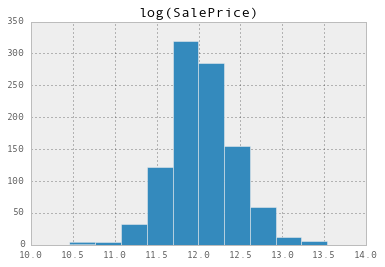

In [96]:
# Check log transform - looks good
%matplotlib inline
train['SalePrice'].log().as_data_frame().hist()

# Execute log transform
train['SalePrice'] = train['SalePrice'].log()
valid['SalePrice'] = valid['SalePrice'].log()
print(train[0:3, 'SalePrice'])

In [97]:
half_train, other_half_train = train.split_frame([0.5], seed=12345)
half_valid, other_half_valid = valid.split_frame([0.5], seed=12345)
print(half_train.shape)
print(half_valid.shape)
print(other_half_train.shape)
print(other_half_valid.shape)
# no idea why this works better, but it does ... 
# could be a lucky split that happens to be more representative of test data
# could be that it just prevents overfitting

(504, 81)
(230, 81)
(497, 81)
(229, 81)


In [98]:
h2o.show_progress()                                          # turn on progress bars
from h2o.estimators.glm import H2OGeneralizedLinearEstimator # import GLM models
from h2o.grid.grid_search import H2OGridSearch               

In [99]:
def glm_grid(X, y, train, valid):
    
    """ Wrapper function for penalized GLM with alpha and lambda search.
    
    :param X: List of inputs.
    :param y: Name of target variable.
    :param train: Name of training H2OFrame.
    :param valid: Name of validation H2OFrame.
    :return: Best H2Omodel from H2OGeneralizedLinearEstimator

    """
    
    alpha_opts = [0.01, 0.25, 0.5, 0.99] # always keep some L2
    hyper_parameters = {"alpha":alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(
            family="gaussian",
            lambda_search=True,
            seed=12345),
        hyper_params=hyper_parameters)
    
    # train grid
    grid.train(y=y,
               x=X, 
               training_frame=train,
               validation_frame=valid)

    # show grid search results
    print(grid.show())

    best = grid.get_grid()[0]
    print(best)
    
    # plot top frame values
    yhat_frame = valid.cbind(best.predict(valid))
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')
    
    # select best model
    return best


glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                       model_ids  \
0     [0.5]  Grid_GLM_py_526_sid_ba4e_model_python_1498414238141_45_model_2   
1    [0.99]  Grid_GLM_py_526_sid_ba4e_model_python_1498414238141_45_model_3   
2    [0.25]  Grid_GLM_py_526_sid_ba4e_model_python_1498414238141_45_model_1   
3    [0.01]  Grid_GLM_py_526_sid_ba4e_model_python_1498414238141_45_model_0   

   residual_deviance  
0  4.036886596981716  
1  4.036946939886153  
2  4.038977366195222  
3  4.566865656717991  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_526_sid_ba4e_model_python_1498414238141_45_model_2


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.01985976805579206
RMSE: 0.14092468930528837
MAE: 0.09457954870791749
RMSLE: 0.010950684470521445
R^2: 0.8732030200586306
Mean Residual Deviance: 0.01985976805579206
Null degrees of f

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-25 16:07:55,0.000 sec,0,.62E0,2,0.1494366,0.1440314
,2017-06-25 16:07:55,0.000 sec,0,.59E0,2,0.1426653,0.1377176
,2017-06-25 16:07:55,0.001 sec,0,.56E0,2,0.1362955,0.1317767
,2017-06-25 16:07:55,0.002 sec,0,.54E0,2,0.1303103,0.1261927
,2017-06-25 16:07:55,0.003 sec,0,.51E0,2,0.1246925,0.1209501
---,---,---,---,---,---,---,---
,2017-06-25 16:07:55,0.152 sec,0,.78E-2,30,0.0199688,0.0176583
,2017-06-25 16:07:55,0.154 sec,0,.75E-2,30,0.0199367,0.0176270
,2017-06-25 16:07:55,0.156 sec,0,.71E-2,30,0.0199086,0.0175990
,2017-06-25 16:07:55,0.157 sec,0,.68E-2,30,0.0198832,0.0175744



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.0012
12.2061,12.3931
11.6784,11.6235
11.914,11.8022
12.6758,12.5101
12.861,12.6982
12.1035,11.9968
11.2898,11.3551
11.7714,11.7034
11.5843,11.4199


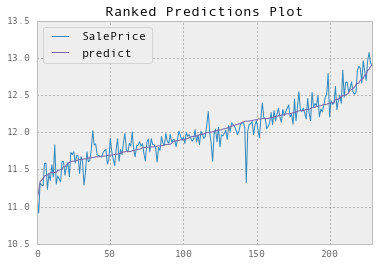

In [100]:
glm0_0 = glm_grid(original_nums, 'SalePrice', half_train, half_valid)
#gen_submission(glm0_0) # Valid RMSE: 0.1325

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                       model_ids  \
0    [0.99]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_46_model_3   
1     [0.5]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_46_model_2   
2    [0.25]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_46_model_1   
3    [0.01]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_46_model_0   

    residual_deviance  
0  3.2600464229090385  
1  3.2620109581172647  
2   3.266063134046975  
3  3.6215122077290913  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_46_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.01962842545011473
RMSE: 0.14010148268349887
MAE: 0.0976547564821056
RMSLE: 0.010763594751781845
R^2: 0.8715103653671922
Mean Residual Deviance: 0.01962842545011473
Null degrees 

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-25 16:08:33,0.000 sec,0,.3E0,2,0.1442675,0.1766220
,2017-06-25 16:08:33,0.000 sec,0,.28E0,2,0.1365238,0.1655749
,2017-06-25 16:08:33,0.001 sec,0,.27E0,2,0.1294652,0.1554957
,2017-06-25 16:08:33,0.002 sec,0,.26E0,2,0.1230313,0.1462994
,2017-06-25 16:08:33,0.003 sec,0,.25E0,2,0.1171668,0.1379085
---,---,---,---,---,---,---,---
,2017-06-25 16:08:34,0.101 sec,0,.38E-2,26,0.0197474,0.0142860
,2017-06-25 16:08:34,0.102 sec,0,.36E-2,26,0.0197134,0.0142702
,2017-06-25 16:08:34,0.103 sec,0,.34E-2,26,0.0196822,0.0142567
,2017-06-25 16:08:34,0.105 sec,0,.33E-2,26,0.0196542,0.0142456



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.7906,11.8054
11.9117,11.9705
11.9767,11.9646
11.8451,11.8228
11.1346,11.3349
11.8845,11.8155
11.9382,11.9083
11.8565,11.7135
11.9704,12.0804
12.6667,12.5417


NameError: name 'gen_submission' is not defined

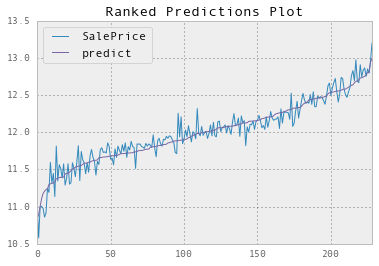

In [101]:
glm0_1 = glm_grid(original_nums, 'SalePrice', other_half_train, other_half_valid)
gen_submission(glm0_1) # Valid RMSE: 0.11931

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                       model_ids  \
0    [0.25]  Grid_GLM_py_491_sid_ba4e_model_python_1498414238141_29_model_1   
1     [0.5]  Grid_GLM_py_491_sid_ba4e_model_python_1498414238141_29_model_2   
2    [0.99]  Grid_GLM_py_491_sid_ba4e_model_python_1498414238141_29_model_3   
3    [0.01]  Grid_GLM_py_491_sid_ba4e_model_python_1498414238141_29_model_0   

    residual_deviance  
0  3.9131726476017525  
1   3.925572947313161  
2  3.9376413024348733  
3   4.652216454838973  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_491_sid_ba4e_model_python_1498414238141_29_model_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.014510362252601572
RMSE: 0.1204589650154839
MAE: 0.08400160776623376
RMSLE: 0.009387588135532053
R^2: 0.9073569184536106
Mean Residual Deviance: 0.014510362252601572
Null degree

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-25 15:42:22,0.000 sec,0,.12E1,2,0.1517198,0.1461600
,2017-06-25 15:42:22,0.002 sec,0,.12E1,2,0.1469379,0.1417017
,2017-06-25 15:42:22,0.003 sec,0,.11E1,4,0.1414922,0.1367441
,2017-06-25 15:42:22,0.005 sec,0,.11E1,4,0.1348517,0.1308836
,2017-06-25 15:42:22,0.007 sec,0,.1E1,4,0.1285856,0.1253531
---,---,---,---,---,---,---,---
,2017-06-25 15:42:22,0.354 sec,0,.16E-1,82,0.0135195,0.0185853
,2017-06-25 15:42:22,0.361 sec,0,.15E-1,82,0.0134773,0.0187187
,2017-06-25 15:42:22,0.367 sec,0,.14E-1,83,0.0134382,0.0188517
,2017-06-25 15:42:22,0.373 sec,0,.14E-1,83,0.0134024,0.0189844



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.1398
12.2061,12.3232
11.6784,11.6869
11.914,11.7671
12.6758,12.5139
12.861,12.6361
12.1035,11.9253
11.2898,11.358
11.7714,11.6431
11.5843,11.4702


NameError: name 'gen_submission' is not defined

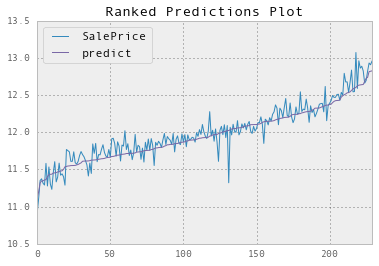

In [53]:
glm1_0 = glm_grid(encoded_nums, 'SalePrice', half_train, half_valid)
#gen_submission(glm1_0) # Valid RMSE: ~0.1231, ~0.1411 on public leaderb

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                       model_ids  \
0    [0.99]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_47_model_3   
1     [0.5]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_47_model_2   
2    [0.25]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_47_model_1   
3    [0.01]  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_47_model_0   

    residual_deviance  
0  3.2600464229090385  
1  3.2620109581172647  
2   3.266063134046975  
3  3.6215122077290913  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_528_sid_ba4e_model_python_1498414238141_47_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.01962842545011473
RMSE: 0.14010148268349887
MAE: 0.0976547564821056
RMSLE: 0.010763594751781845
R^2: 0.8715103653671922
Mean Residual Deviance: 0.01962842545011473
Null degrees 

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-25 16:13:08,0.000 sec,0,.3E0,2,0.1442675,0.1766220
,2017-06-25 16:13:08,0.001 sec,0,.28E0,2,0.1365238,0.1655749
,2017-06-25 16:13:08,0.001 sec,0,.27E0,2,0.1294652,0.1554957
,2017-06-25 16:13:08,0.002 sec,0,.26E0,2,0.1230313,0.1462994
,2017-06-25 16:13:08,0.002 sec,0,.25E0,2,0.1171668,0.1379085
---,---,---,---,---,---,---,---
,2017-06-25 16:13:08,0.085 sec,0,.38E-2,26,0.0197474,0.0142860
,2017-06-25 16:13:08,0.086 sec,0,.36E-2,26,0.0197134,0.0142702
,2017-06-25 16:13:08,0.087 sec,0,.34E-2,26,0.0196822,0.0142567
,2017-06-25 16:13:08,0.088 sec,0,.33E-2,26,0.0196542,0.0142456



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.7906,11.8054
11.9117,11.9705
11.9767,11.9646
11.8451,11.8228
11.1346,11.3349
11.8845,11.8155
11.9382,11.9083
11.8565,11.7135
11.9704,12.0804
12.6667,12.5417


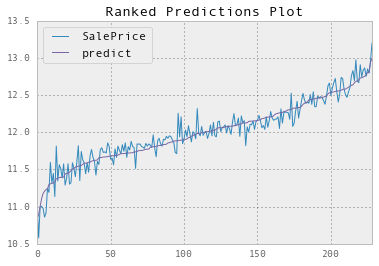

In [102]:
glm1_1 = glm_grid(encoded_nums, 'SalePrice', other_half_train, other_half_valid)
#gen_submission(glm1_1) # Valid RMSE: ~0.11931

I. Define Ranked Predictions Plot Function

In [167]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

J. Define Ranked Predictions Plot Function

In [168]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

K. Define Function to Generate Submission File

In [30]:
import re
import time

def gen_submission(preds, test=test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param preds: Column vector of predictions.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(preds.exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = '../data/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)

L. Define Function to Generate Submission File

In [31]:
import re
import time

def gen_submission(preds, test=test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param preds: Column vector of predictions.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(preds.exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = '../data/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)

M. Define Prediction Blending Function

In [32]:
import os

def pred_blender(dir_, files):
    
    """ Performs simple blending of prediction files. 
    
    :param dir_: Directory in which files to be read are stored.
    :param files: List of prediction files to be blended.
    
    """
    
    # read predictions in files list and cbind
    for i, file in enumerate(files):
        if i == 0:
            df = pd.read_csv(dir_ + os.sep + file).drop('SalePrice', axis=1)
        col = pd.read_csv(dir_ + os.sep + file).drop('Id', axis=1)
        col.columns = ['SalePrice' + str(i)]
        df = pd.concat([df, col], axis=1)
        
    # create mean prediction    
    df['mean'] = df.iloc[:, 1:].mean(axis=1)
    print(df.head())
        
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())        
        
    # write new submission file    
    df = df[['Id', 'mean']]
    df.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = '../data/submission_' + str(time_stamp) + '.csv'
    df.to_csv(sub_fname, index=False)

N. H2O XGBoost

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1498259532111_14


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.006249147902781442
RMSE: 0.07905155218451718
MAE: 0.04452643742213597
RMSLE: 0.0061526671615094964
Mean Residual Deviance: 0.006249147902781442

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.018461613204758646
RMSE: 0.13587351914467605
MAE: 0.1051642847996132
RMSLE: 0.010560618933547249
Mean Residual Deviance: 0.018461613204758646

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.017153125537798124
RMSE: 0.13096994135219778
MAE: 0.08812153232204807
RMSLE: 0.010136969402534158
Mean Residual Deviance: 0.017153125537798124
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0880800,0.0016962,0.0847976,0.0889790,0.0904633
mean_residual_deviance,0.0171012,0.0014760,0.0179675,0.0191120,0.0142241
mse,0.0171012,0.0014760,0.0179675,0.0191120,0.0142241
r2,0.8891434,0.0016516,0.8862064,0.8919211,0.8893027
residual_deviance,0.0171012,0.0014760,0.0179675,0.0191120,0.0142241
rmse,0.1305180,0.0057559,0.1340429,0.1382462,0.1192648
rmsle,0.0100965,0.0004909,0.0104083,0.0107469,0.0091344


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-23 17:30:05,12 min 34.902 sec,0.0,11.5392208,11.5324996,133.1536163,11.5129466,11.5056257,132.5479390
,2017-06-23 17:30:06,12 min 36.540 sec,1.0,11.4819725,11.4752177,131.8356917,11.4557013,11.4483439,131.2330931
,2017-06-23 17:30:06,12 min 36.560 sec,2.0,11.4252392,11.4184509,130.5360912,11.3989712,11.3915771,129.9365437
,2017-06-23 17:30:06,12 min 36.580 sec,3.0,11.3686105,11.3617884,129.2453045,11.3423455,11.3349145,128.6488025
,2017-06-23 17:30:06,12 min 36.600 sec,4.0,11.3123222,11.3054661,127.9686331,11.2860604,11.2785922,127.3751584
---,---,---,---,---,---,---,---,---,---
,2017-06-23 17:34:44,17 min 14.447 sec,4879.0,0.0806099,0.0456638,0.0064980,0.1341500,0.1035046,0.0179962
,2017-06-23 17:34:48,17 min 18.497 sec,4944.0,0.0802204,0.0454222,0.0064353,0.1346284,0.1041173,0.0181248
,2017-06-23 17:34:52,17 min 22.541 sec,5006.0,0.0798129,0.0451062,0.0063701,0.1352055,0.1047045,0.0182805
,2017-06-23 17:34:56,17 min 26.542 sec,5067.0,0.0794222,0.0448352,0.0063079,0.1361481,0.1055130,0.0185363



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
LotFrontage|MoSold,129.0,1.0,0.0047675
MSSubClass|LotFrontage,109.0,0.8449612,0.0040284
MSSubClass|BsmtUnfSF,104.0,0.8062016,0.0038436
LotFrontage|BsmtUnfSF,94.0,0.7286822,0.0034740
TotalBsmtSF|MoSold,92.0,0.7131783,0.0034001
---,---,---,---
BldgType_Tencode|Heating_Tencode,1.0,0.0077519,0.0000370
Exterior2nd_Tencode|Electrical_Tencode,1.0,0.0077519,0.0000370
BsmtFinSF2|TotalBsmtSF,1.0,0.0077519,0.0000370
MSSubClass|GarageQual_Tencode,1.0,0.0077519,0.0000370



See the whole table with table.as_data_frame()

xgboost prediction progress: |████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.034
12.2061,12.2803
11.6784,11.5962
11.7906,11.5897
11.9117,11.8548
11.9767,11.9089
11.8451,11.587
11.1346,11.0992
11.914,11.8051
11.8845,11.8596



xgboost prediction progress: |████████████████████████████████████████████| 100%


FileNotFoundError: [Errno 2] No such file or directory: '../data/submission_Fri_Jun_23_17_35_05_2017.csv'

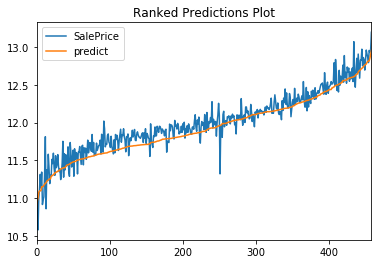

In [34]:
# initialize XGB GBM
h2o_xgb_model = H2OXGBoostEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# execute training 
h2o_xgb_model.train(x=encoded_combined_nums,
                    y='SalePrice',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_xgb_model)
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
ranked_preds_plot('SalePrice', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)
gen_submission(h2o_xgb_preds1_test) # 0.16494 on public leaderboard